Task 1 (20 points) For the Titanic challenge (https://www.kaggle.com/c/titanic,we need to guess whether the individuals from the test dataset had survived or not. 

In [ ]:
#Data analysis and wrangling
import pandas as pd
import numpy as np
#Data Visualization
import graphviz
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor

### 1. Preprocess your Titanic training data 

In [ ]:
# Load train and test datasets

train_dataframe = pd.read_csv('/content/sample_data/titanic_dataset/train (1).csv')
test_dataframe = pd.read_csv('/content/sample_data/titanic_dataset/test (1).csv')



In [ ]:
# Print the number of coulums, their ids, the number of non-null elements, and the type for each feature in the training set
print(train_dataframe.info())

# Print some mathematical values associated with the numerical variables
train_dataframe.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Checking options for Pclass feature to determine how many splits it can have
print (train_dataframe["Pclass"].value_counts())

# Checking options for SibSp feature to determine how many splits it can have
print (train_dataframe["SibSp"].value_counts())

# Checking options for Parch feature to determine how many splits it can have
print (train_dataframe["Parch"].value_counts())

# Checking options for Cabin feature to determine how many splits it can have
print (train_dataframe["Cabin"].value_counts())

# Checking options for Embarked feature for filling in the null values afterwards in the training set
print(train_dataframe["Embarked"].value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [ ]:
#print the information on test data frame
print(test_dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [ ]:
# Seperate labels from data
training_data_X = train_dataframe.drop("Survived", axis='columns')
training_data_Y = train_dataframe["Survived"]

# Check to make sure labels were seperated properly
# print(training_data_X.info())
# print(training_data_Y)

# Handle the missing age feature values
training_data_X["Age"] = training_data_X["Age"].fillna(training_data_X["Age"].mean())
test_dataframe["Age"] = test_dataframe["Age"].fillna(test_dataframe["Age"].mean())

# Cabin is ignored since it will be dropped due to the massive amount of missing data as well as having so many possible splits

# Handle the sex feature value to be 0 or 1 for easier understanding
training_data_X["Sex"] = training_data_X["Sex"].map({"male": 0, "female": 1})
test_dataframe["Sex"] = test_dataframe["Sex"].map({"male": 0, "female": 1})

# Handle the missing embarked feature values
training_data_X["Embarked"] = training_data_X["Embarked"].fillna(training_data_X["Embarked"][0])
training_data_X["Embarked"] = training_data_X["Embarked"].map({"S": 0, "C": 1, "Q": 2})
# Handle the missing fare feature value in test data
test_dataframe = test_dataframe["Fare"].fillna(test_dataframe["Fare"].mean())

In [ ]:
# Dropping excluded features from training data
training_data_X = training_data_X.drop(["PassengerId", "Name", "Ticket", "Cabin", "Embarked"], axis="columns")

# Checking features dropped properly
print(training_data_X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int64  
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB
None


**2.CReate/Plot Decisison Tree Model**

Using the sklearn library and the graphviz , I am going to create a decision tree classifier, fit it to the training data, and plot the resulting tree

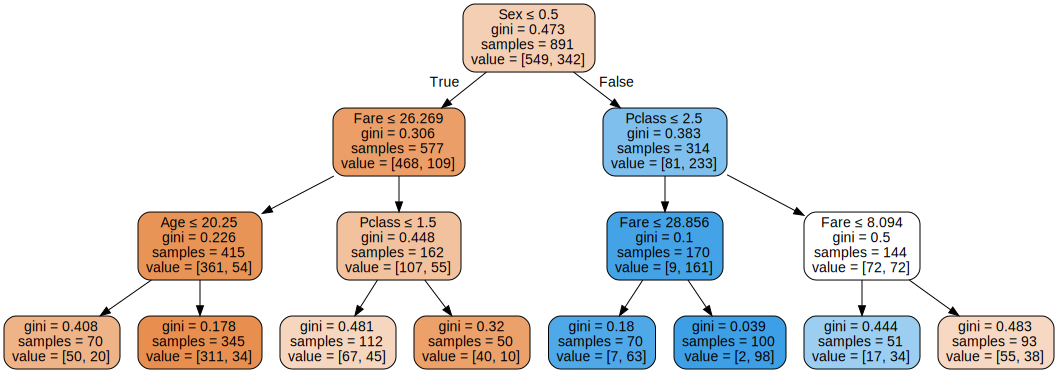

In [ ]:
# Import sklearn.tree and graphviz
from sklearn import tree
import graphviz

# Get list of feature names
features_list = list(training_data_X.columns)

# Set up parameters for DecisionTreeClassifier for easier tweeking
dt_tree_params = {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 50, 'min_samples_split': 50}

# Build the decision tree model
dt_model = tree.DecisionTreeClassifier(**dt_tree_params)

# Fit the decision tree model to the training data
dt_model.fit(training_data_X, training_data_Y)

# Visualize/Plot the graph of the decision tree using graphviz
visualized_dt_tree = tree.export_graphviz(dt_model, out_file=None, filled=True, rounded=True, special_characters=True, feature_names = features_list)
dt_graph = graphviz.Source(visualized_dt_tree)
dt_graph

**Five fold cross validation for decision tree**

Five Fold Cross:  [0.82681564 0.78651685 0.79775281 0.79775281 0.82022472]
Average of Five Fold Cross:  0.8058125666938671


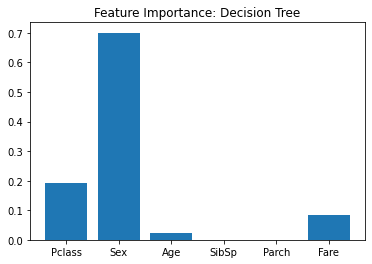

In [ ]:
#Import cross_val_score from sklearn to perfrom five fold cross validation
from sklearn.model_selection import cross_val_score

five_fold_cross_dt = cross_val_score(dt_model, training_data_X, training_data_Y, cv=5)
print("Five Fold Cross: ", five_fold_cross_dt)
print("Average of Five Fold Cross: ", np.average(five_fold_cross_dt))

dt_important_features = dt_model.feature_importances_
plt.bar(features_list, dt_important_features)
plt.title("Feature Importance: Decision Tree")
plt.show()

**4.Create/plot Random Forest Model**

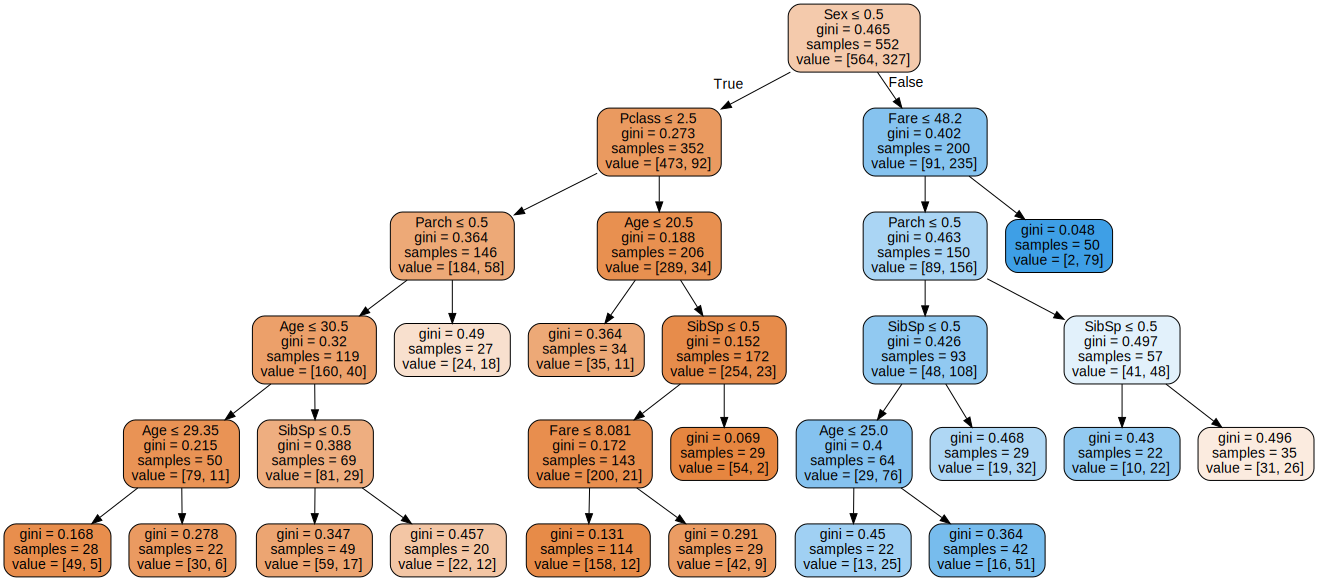

In [ ]:
# Import_RandomForestClassifier_from_sklearn
from sklearn.ensemble import RandomForestClassifier

# Set up parameters for RandomForestClassifier for easier tweeking
rf_tree_params = {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 20, 'n_estimators': 10}

# Build_Random_Forest_Model
rf_model = RandomForestClassifier(**rf_tree_params)

# Fit Random Forest Model to training data
rf_model.fit(training_data_X, training_data_Y)

# Get first estimator from random forest for plot
estimator = rf_model.estimators_[0]

# Visualize/Plot the graph of the random forest using graphviz
visualized_rf_tree = tree.export_graphviz(estimator, out_file=None, filled=True, rounded=True, special_characters=True, feature_names = features_list)
rf_graph = graphviz.Source(visualized_rf_tree)
rf_graph

**4.Five Fold cross validation for Random Forest**

Five Fold Cross:  [0.74301676 0.79775281 0.83146067 0.78089888 0.80898876]
Average of Five Fold Cross:  0.7924235766744084


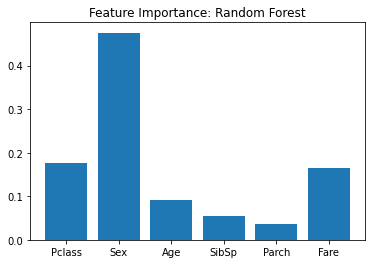

In [ ]:
# Perform_five_fold_cross_validation_and_find_average
five_fold_cross_rf = cross_val_score(rf_model, training_data_X, training_data_Y, cv=5)
print("Five Fold Cross: ", five_fold_cross_rf)
print("Average of Five Fold Cross: ", np.average(five_fold_cross_rf))

# For_tweeking_purposes_find_feature_importance_to_possible_adjust_feature_selection
rf_important_features = rf_model.feature_importances_
#print(rf_important_features)
plt.bar(features_list, rf_important_features)
plt.title("Feature Importance: Random Forest")
plt.show()

**5.Comparsion/Analysis Between Decision Tree and Random Forest**

According to the program's results, a decision tree classifier appears to be more stable than the random forest classifier, but the random forest classifier has the potential to be superior. Each modification in the decision tree's variables during cross validations resulted in a change in the tree that persisted over numerous runs with the same variables. On the other hand, random forest has a range of values it can obtain through cross validation even when the variables are left intact; occasionally, it has been more than the decision tree's value, but it has typically been lower.

The real potential of these two models will need to be tested further, however as a point of reference, the best average validation scores during testing were:


*   Decision Tree: 0.8058125666938671
*  Random Forest: 0.8092021844203126




## Task 6: 

**Construct a support vector machine that computes the kernel function. Use four values of +1 and -1 for both inputs and outputs: (20 points)**

        [−1, −1] (negative)
        
        [−1, +1] (positive)
        
        [+1, −1] (positive)
        
        [+1, +1] (negative).

- Map the input [x1, x2] into a space consisting of x1 and x1x2. Draw the four input points in this space, and the maximal margin separator. What is the margin? 【 To be consistent with our lecture notes, margin is defined as the distance from the middle way/hyperplane to either support vectors. 】

Text(0.5, 1.0, 'Scatter plot of data to be classified')

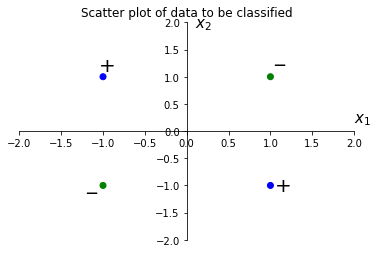

In [36]:
## Plotting data

x = np.array([[-1,-1],
              [-1,1],
              [1,-1],
              [1,1]])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.scatter(x[:,0],x[:,1],c=['g','b','b','g'])
plt.text(-1.2,-1.05,'_', fontsize=20)
plt.text(1.05,-1.1,'+', fontsize=20)
plt.text(1.05,1.3,'_', fontsize=20)
plt.text(-1.05,1.1,'+', fontsize=20)
plt.text(2,0.15,'$x_1$', fontsize=15)
plt.text(0.1,1.9,'$x_2$', fontsize=15)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('Scatter plot of data to be classified')

### Transforming input [x1, x2] into a space consisting of x1 and x1x2.

In [34]:
x1x2 = np.prod(x,axis=1)
x_new = np.array([x[:,0], x1x2]).T
x_new

array([[-1,  1],
       [-1, -1],
       [ 1, -1],
       [ 1,  1]])

Text(0.5, 1.0, 'Scatter plot of transformed data')

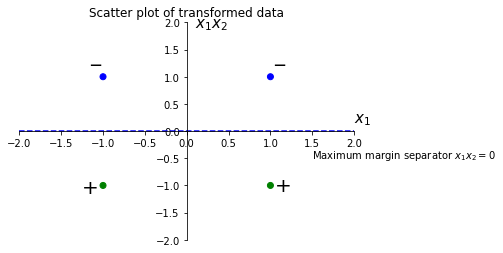

In [37]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
a = np.arange(-2,2.2,0.1)

plt.scatter(x_new[:,0],x_new[:,1],c=['b','g','g','b'])
plt.plot(a,np.zeros_like(a),'b--')
plt.text(-1.25,-1.15,'+', fontsize=20)
plt.text(1.05,-1.1,'+', fontsize=20)
plt.text(1.05,1.3,'_', fontsize=20)
plt.text(-1.15,1.3,'_', fontsize=20)
plt.text(1.5,-0.5,r'Maximum margin separator $x_1x_2 = 0$')
plt.text(2,0.15,'$x_1$', fontsize=15)
plt.text(0.1,1.9,'$x_1x_2$', fontsize=15)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('Scatter plot of transformed data')